In [ ]:
One fascinating area of research uses GPS to track the movements of animals. 
It is now possible to manufacture a small GPS device that is solar charged, 
so you don’t need to change batteries and use it to track flight patterns of birds. 
The data for this case study comes from the LifeWatch INBO project.
Several data sets have been released as part of this project.
We will use a small data set that consists of migration data for three gulls named Eric, Nico, and Sanne.
The csv file contains eight columns, and includes variables
like latitude, longitude, altitude, and time stamps.
In this case study, we will first load the data,
visualize some simple flight trajectories,
track flight speed, learn about  daytime and much, much more.

In [ ]:
Aim: Track the movement of three gulls namely – Eric, Nico & Sanne
DATASET USED :bird_tracking (1)
LOCATION OF DATA :C:\Users\SSD 1\Documents\Downloads
Dependencies: Matplotlib, Pandas, Numpy, Cartopy, Shapely
    

In [ ]:
We will divide our case study into five parts: 
1. Visualizing longitude and latitude data of the gulls. 
2. Visualize the variation of the speed of the gulls. 
3. Visualize the time required by the gulls to cover equal distances over the journey. 
4. Visualize the daily mean speed of the gulls. 
5. Cartographic view of the journey of the gulls.

In [ ]:
Order of Project subparts :
1.bird_migration_trajectories_lat.long.py
2.bird_migration_speed.py
3.bird_migration_date.time.py
4.bird_migration_daily_mean_speed.py
5.bird_migration_cartographic.py

In [ ]:
I did this project to accompany my learnings from HarvardX course - PH526x Using Python for Research


- K RAHUL NAIK(naik94445@gmail.com)


In [ ]:
PART (1/5): Latitude and Longitude 
In this part, we are going to visualize the location of the birds.
We are going to plot latitude and longitude along the y and x-axis respectively 
and visualize the location data present in the csv file. 

In [ ]:
#IMPORTING ALL REQUIRED LIBRARIES

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
# storing the indices of the bird Eric

In [14]:
data = pd.read_csv('bird_tracking.csv')


In [16]:
cr = data.groupby('bird_name').groups
cr_groups = data.groupby('bird_name')

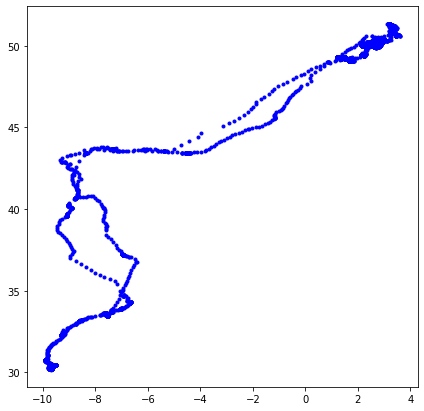

In [23]:
ix = data.bird_name == "Eric" #storing the indices of the bird Eric
x,y = data.longitude[ix], data.latitude[ix]
plt.figure(figsize = (7,7))
plt.plot(x,y,"b.")

In [17]:
group_list = []
for group in cr:
   group_list.append(group)


In [18]:
plt.figure(figsize=(7, 7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

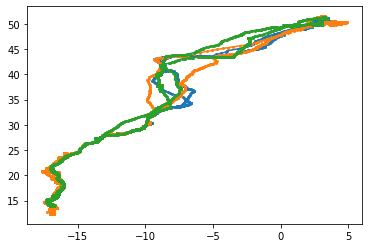

In [24]:
#Create graph from dataset using the first group of cranes
for group in group_list:
   x,y = cr_groups.get_group(group).longitude, cr_groups.get_group(group).latitude
   plt.plot(x,y, marker='o', markersize=2)
plt.show()

In [ ]:
We use the matplotlib function, figure() to initialize size of the figure as 7 x 7
and plot it using the plot() function.
The parameters inside the function plot() i.e x, y and “b.”
are specifying to use longitude data along x axis(for x), latitude along y(for y) and b=blue, . = circles in the visualization. 

In [ ]:
PART (2/5): 2D Speed Vs Frequency 
In this second part of the case study, we are going to visualize 2D speed vs Frequency for the gull named “Eric”.



In [28]:
# storing the indices of the bird Eric 
ix = data.bird_name == "Eric"
speed = data.speed_2d[ix] 

AttributeError: 'Rectangle' object has no property 'normed'

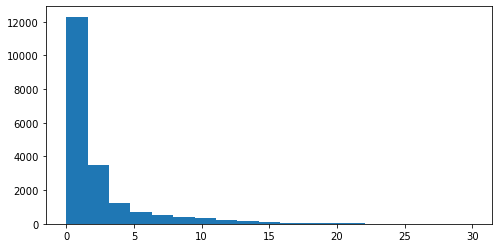

In [29]:
plt.figure(figsize = (8,4)) 
ind = np.isnan(speed) 
plt.hist(speed[~ind], bins = np.linspace(0,30,20), normed=True) 
plt.xlabel(" 2D speed (m/s) ") 
plt.ylabel(" Frequency ") 
plt.show() 

In [ ]:
The parameters speed[~ind] indicates that we will include only those entries for which
ind != True, bins=np.linspace(0,30,20) indicates the bins along the x-axis will vary from 0 to 30 with 20 bins within them,
linearly spaced. Lastly, we plot 2D speed in m/s along the x-axis and 
Frequency along the y-axis using the xlabel() and ylabel() functions respectively and plot the data using plt.show().



In [ ]:
PART (3/5): Time and Date 
The third part is associated with date and time.
We are going to visualize the time(in days) required by Eric to cover constant distances through his journey. 
If he covers equal distances in an equal amount of time, then the Elapsed time vs Observation curve will be linear. 

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime 
import numpy as np 

In [32]:
timestamps = [] 
for k in range(len(data)): 
	timestamps.append(datetime.datetime.strptime(data.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S")) 

data["timestamp"] = pd.Series(timestamps, index = data.index) 

In [33]:
times = data.timestamp[data.bird_name == "Eric"] 
elapsed_time = [time-times[0] for time in times] 

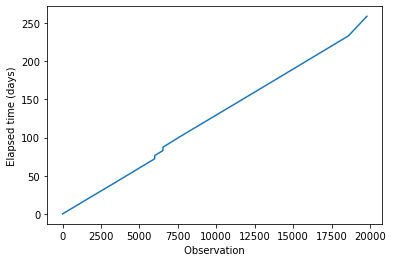

In [34]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1)) 
plt.xlabel(" Observation ") 
plt.ylabel(" Elapsed time (days) ") 
plt.show() 

In [ ]:
“>>>datetime.datetime.today()”, returns the current Date (yy-mm-dd) & time (h:m:s). 
“>>>date_str[:-3]”, slices/removes the UTC +00 coordinated time stamps. 
“>>>datetime.datetime.strptime(date_str[:-3], “%Y-%m-%d %H:%M:%S”)” ,
the time-stamp strings from date_str are converted to datetime object to be worked upon.
“%Y-%m-%d %H:%M:%S” is the Year-Month-Date and Hour-Minute-Second format.

In [ ]:
PART (4/5): Daily Mean Speed 
We are going to visualize the daily mean speed of the gull named “Eric” for the total number of days of recorded flight. 

In [35]:
timestamps = [] 
for k in range(len(data)): 
	timestamps.append(datetime.datetime.strptime(data.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S")) 
data["timestamp"] = pd.Series(timestamps, index = data.index) 

In [39]:
data = data[data.bird_name == "Eric"] 
times = data.timestamp 
elapsed_time = [time-times[0] for time in times] 
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1) 


In [40]:
next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

In [ ]:
enumerate() - is one of the built-in Python functions.
It returns an enumerated object. 
In our case, that object is a list of tuples (immutable lists), each containing a pair of count/index and value.

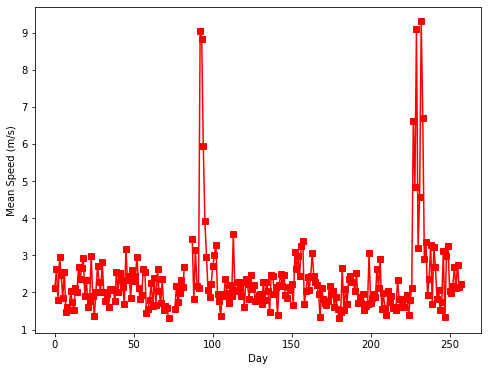

In [41]:
plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed, "rs-")
plt.xlabel(" Day ")
plt.ylabel(" Mean Speed (m/s) ");
plt.show()

In [ ]:
PART (5/5): Cartographic View 
In this last part, we are going to track the Birds over a map. 

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
These modules are important for mapping data
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
We add the salient physical features of a map.


In [42]:
import pandas as pd 
import cartopy.crs as ccrs 
import cartopy.feature as cfeature 
import matplotlib.pyplot as plt 

In [43]:
birddata = pd.read_csv("bird_tracking.csv")
bird_names = pd.unique(birddata.bird_name)
 

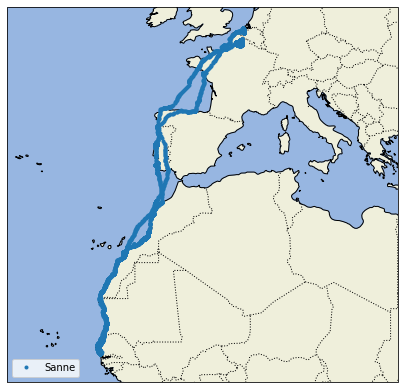

In [48]:
projection = ccrs.Mercator()
plt.figure(figsize=(7,7))
axes = plt.axes(projection=projection)
axes.set_extent((-30.0, 25.0, 50.0, 10.0))
axes.add_feature(cfeature.LAND)
axes.add_feature(cfeature.OCEAN)
axes.add_feature(cfeature.COASTLINE)
axes.add_feature(cfeature.BORDERS, linestyle=':')
for bird_name in bird_names:
   index = birddata['bird_name'] == bird_name
axes.plot(x,y,'.', transform=ccrs.Geodetic(), label=bird_name)
plt.legend(loc="lower left")
plt.show()

In [49]:
eric = (birddata.bird_name=="Eric")

In [50]:
plt.style.use("ggplot")
colors = ["#3585BC", "#FF7E0E", "#2B9F2B"]

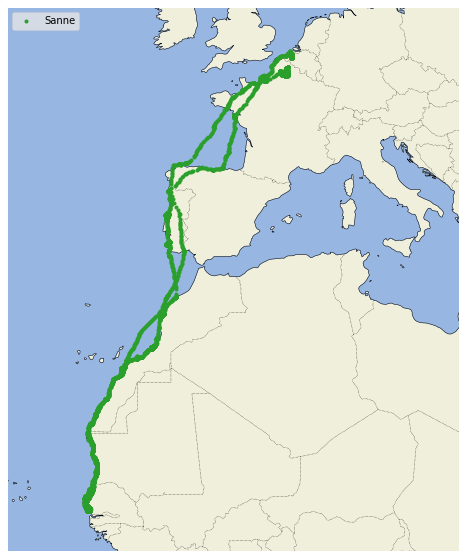

In [52]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

for bird_name, c in zip(bird_names, colors):
    ind = (birddata["bird_name"] == bird_name)
ax.plot(x, y, ".", transform=ccrs.Geodetic(), label=bird_name, color=c)
plt.legend(loc="upper left")
plt.savefig("map.pdf")

In [ ]:
Resources : 
1. edX – HarvardX – Using Python for Research 
2. Python functions doc_I 
3. Python functions doc_II